## Text Processing: Word Frequency in Les Misérables

<p> The following project consists on identify and visualize the word frequency distribution using Natural language processing tools to work with unstructured text data.<p> 

- First, scraping the novel <em>Les Misérables</em> from the website <a href="https://www.gutenberg.org/"> Gutenberg.org </a>   using the request package.
- Second, extracting text from this web data using <code>BeautifulSoup</code>. 
- Third, extracting tokens/words and clean data: removing inwanted characters, transforming tokens into lowercase and excluding stop words.
- Finally, analyzing the distribution of words using the Natural Language ToolKit (<code>nltk</code>). 

Data Science pipeline:

- State your question:
- Get your data;
- Wrangle your data to answer your question;
- Answer your question;
- Present your solution so that others can understand it.

## 1. State your question
What are the most frequent words in the novel Les Misérables and how often do they occur?

## 2. Import packages and load/scrape data

Using the freely available online novels corpus at Project Gutenberg, we are going to store the URL in our Python namespace.
To fetch the HTML file we're going to use the request package to make a GET request for the website, which means we're getting data from it directly into Python.

In [2]:
# Importing packages
import requests # to fetch the html file that contains the book.
from bs4 import BeautifulSoup # to extract the words from the html file.
import nltk # to analyze the word frequencies.
%matplotlib inline # command to display figures inline


# Scrape the novel from the website using the Python package requests:
url = 'https://www.gutenberg.org/files/135/135-h/135-h.htm'

r = requests.get(url)

#Setting the correct text encoding of the HTML page
r.encoding = 'utf-8'

type(r)

# Extracting the HTML from the request object
html = r.text
#print(html)

# Printing the first 2000 characters in html
print(html[0:200])

<?xml version="1.0" encoding="utf-8"?>

<!DOCTYPE html
   PUBLIC "-//W3C//DTD XHTML 1.0 Strict//EN"
   "http://www.w3.org/TR/xhtml1/DTD/xhtml1-strict.dtd" >

<html xmlns="http://www.w3.org/1999/


## 3. Extract the text from the HTML object using beatiful soup

The HTML file contain the text of the novel. We need to wrangle this HTML to extract the text of the novel using the package BeautifulSoup.
After creating the soup, we can use its .get_text() method to extract the text.

In [4]:
# Creating a BeautifulSoup object from the HTML
soup = BeautifulSoup(html, "html5lib")
type(soup)

# Getting the text out of the soup
text = soup.get_text()

# Printing out text between characters 23000 and 24000
print(text[23000:24000])

ch had been in circulation about him from the very moment when
he arrived in the diocese. True or false, that which is said of men often
occupies as important a place in their lives, and above all in their
destinies, as that which they do. M. Myriel was the son of a councillor of
the Parliament of Aix; hence he belonged to the nobility of the bar. It
was said that his father, destining him to be the heir of his own post,
had married him at a very early age, eighteen or twenty, in accordance
with a custom which is rather widely prevalent in parliamentary families.
In spite of this marriage, however, it was said that Charles Myriel
created a great deal of talk. He was well formed, though rather short in
stature, elegant, graceful, intelligent; the whole of the first portion of
his life had been devoted to the world and to gallantry.


The Revolution came; events succeeded each other with precipitation; the
parliamentary families, decimated, pursued, hunted down, were dispersed.
M. Charle

## 4. Extract the words from the text object using nltk
We now have the text of the novel, as a first approximation, we are leaving the appendix and another ndesired content. 
We are going to count how many times each word appears, and for this we'll use nltk – the Natural Language Toolkit. 
- We'll start by tokenizing the text, removing everything that isn't a word (whitespace, punctuation, etc.) 
- and then split the text into a list of words.

In [5]:
# Creating a tokenizer
tokenizer = nltk.tokenize.RegexpTokenizer('\w+')

# '\w+' will match arbitrary sequences of alphanumeric characters and underscores.
# The '\w' will match any alphanumeric A-z, a-z, 0-9, along with underscores.
# The '+' tells you that the previous character in the regexp 
# can appear as many times as you want

# Tokenizing the text
tokens = tokenizer.tokenize(text)

# Printing out the first 8 words / tokens 
print(tokens[0:8])

['Les', 'Misérables', 'Five', 'Volumes', 'Complete', 'by', 'Victor', 'Hugo']


## 5. Make the words lowercase for counting purposes
We create a list of all words in which all capital letters have been made lower case, to count latter on same uppercase and lowercase word as one token.  

In [6]:
# A new list to hold the lowercased words
words = []

# Looping through the tokens and make them lower case
for word in tokens:
    words.append(word.lower())

# Printing out the first 8 words / tokens 
print(words[:8])

['les', 'misérables', 'five', 'volumes', 'complete', 'by', 'victor', 'hugo']


## 6. Excluding stop words from corpus
Stopwords are common words that carry less important meaning than keywords. We are going to remove them from our corpus by storing a list of English words from the NLTK package.

In [10]:
# Getting the English stop words from nltk
sw = nltk.corpus.stopwords.words('english')

# Printing out the first eight stop words
print(sw[:8])


## Removing stop words from corpus

# creating a new list with no stepwords
words_ns = []

# Appending to words_ns all words that are in words but not in sw
for word in words:
    if word not in sw:
        words_ns.append(word)
        

# Printing the first 5 words_ns to check that stop words are gone
print(words_ns[:5]) # 'by' has been removed from the sample

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves']
['les', 'misérables', 'five', 'volumes', 'complete']


## 7. Calculating the word frequency and plotting the top 25 words.

We are going to create a word frequency distribution plot using nltk.

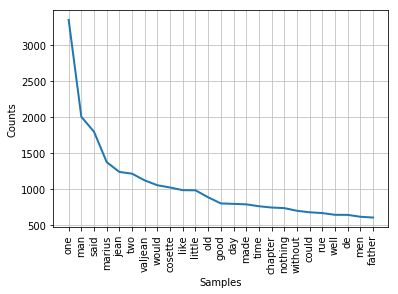

In [13]:
# Creating the word frequency distribution
freqdist = nltk.FreqDist(words_ns)
freqdist

# Plotting the word frequency distribution (25 most frequent words)
freqdist.plot(25)

In [14]:
## The most common word

# What's the most common word?
most_common_word = freqdist.max()
print(most_common_word) # one

one
